In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [12]:
fast100 = pd.read_csv("../results_04_27/FAST_KNN_NO_ObjIndex100.csv")
fast50 = pd.read_csv("../results_04_27/FAST_KNN_NO_ObjIndexdt50.csv")
fast25 = pd.read_csv("../results_04_27/FAST_KNN_NO_ObjIndexdt25.csv")
fast10 = pd.read_csv("../results_04_27/FAST_KNN_NO_ObjIndexdt10.csv")
fast5 = pd.read_csv("../results_04_27/FAST_KNN_NO_ObjIndexdt5.csv")
ckqst = pd.read_csv("../results_04_27/CKQST_KNN_NO.csv")

res = pd.concat([
    fast100.loc[:, ['creation_time', 'search_time', 'num_queries', 'name', 'knn_deg_ratio']],
    fast50.loc[:, ['creation_time', 'search_time', 'num_queries', 'name', 'knn_deg_ratio']],
    fast25.loc[:, ['creation_time', 'search_time', 'num_queries', 'name', 'knn_deg_ratio']],
    fast10.loc[:, ['creation_time', 'search_time', 'num_queries', 'name', 'knn_deg_ratio']],
    fast5.loc[:, ['creation_time', 'search_time', 'num_queries', 'name', 'knn_deg_ratio']],
])

res_base = ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']]


name_map = {
    "FAST_KNN_NO_ObjIndex": "FAST",
    "FAST_KNN_NO_ObjIndexdt50": "FAST",
    "FAST_KNN_NO_ObjIndexdt25": "FAST",
    "FAST_KNN_NO_ObjIndexdt10": "FAST",
    "FAST_KNN_NO_ObjIndexdt5": "FAST",

    # "FAST_KNN_NO_ObjIndex_L9_spatialuni": "FAST - Strat. 5 (SpatialUni)",
    "CkQST_KNN_NO": "CkQST (Baseline)",
    # "CkQST_KNN_NO_L9_spatialuni": "CkQST (SpatialUni)",
}
res['name'] = res['name'].apply(lambda x: name_map[x])
res_base['name'] = res_base['name'].apply(lambda x: name_map[x])
# res = res.sort_values(by=['name'])
# res = res[~(res['num_queries'] == 100000)]
res

,creation_time,search_time,num_queries,name,knn_deg_ratio
0,47709214689,5580408041,100000,FAST,100
1,49819343715,5336414893,100000,FAST,100
2,48904885813,5377235197,100000,FAST,100
0,47094699447,4350488619,100000,FAST,50
1,49450419804,4098529013,100000,FAST,50
2,49693119032,4103222037,100000,FAST,50
0,47552729035,3572000839,100000,FAST,25
1,50709743568,3403803212,100000,FAST,25
2,49828234193,3505215159,100000,FAST,25
0,48232201216,2622072786,100000,FAST,10


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

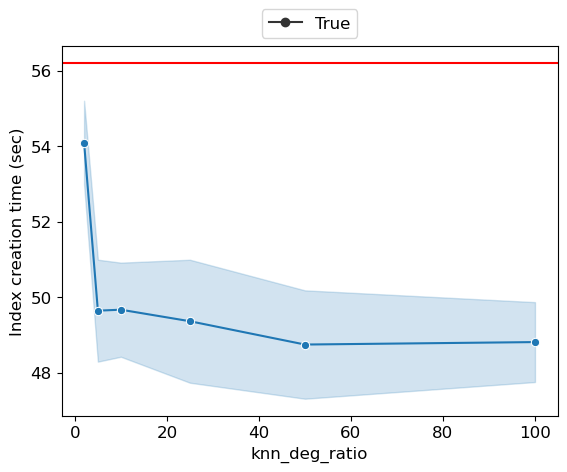

In [24]:
search_res = res.loc[:, ['creation_time', 'knn_deg_ratio']]
# search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
# search_res = search_res.rename(columns={"num_queries": "No. of queries"})

ax = sns.lineplot(x="knn_deg_ratio", y='Index creation time (sec)', style=True, data=search_res, errorbar='sd',
             markers=True)
plt.axhline(y = ckqst['creation_time'].mean() / 1000000000, color = 'r', linestyle = '-') 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

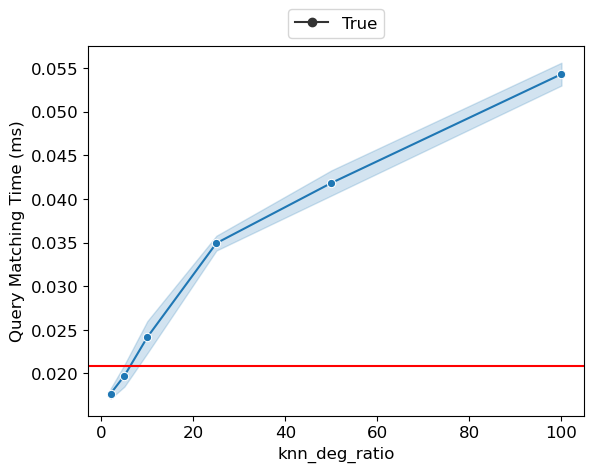

In [23]:
search_res = res.loc[:, ['search_time', 'knn_deg_ratio']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (
            100000 * 1000000)
# search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

ax = sns.lineplot(x="knn_deg_ratio", y='Query Matching Time (ms)', style=True, data=search_res, errorbar='sd', markers=True)
plt.axhline(y = ckqst['search_time'].mean() / (100000 * 1000000), color = 'r', linestyle = '-') 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [8]:
# Optimization
# - Custom iterator
# - Circle bound calculation